Try some integrals over G_0(q,q) = (alpha+ c q^2)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '15'


In [17]:
cutoff_length=.01*2*math.pi/100

In [210]:
alpha=-1

In [211]:

def int_G(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length)
    minq=math.floor(1/l)
    #doing a square shell:
    #        |  
    #        |   ##
    #   ------------
    #        |   ##
    #        |   ##
    #this domain x4
    for qx in range(minq,maxq ):
        for qy in range(-maxq+1,minq):
            sum_+=1/(alpha+c*(qx**2+qy**2))
    return 4*sum_

def int_G_circlelimit(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length*2/math.sqrt(math.pi))
    minq=math.floor(1/l*2/math.sqrt(math.pi))
    minqsquared = minq**2
    maxqsquared=((maxq-1))**2
    #make sure to get a circle, not a square
    for qx in range(math.floor(minq/math.sqrt(2)),maxq ):
        for qy in range(-maxq+1,math.floor(minq/math.sqrt(2))):
            qsquared=qx**2+qy**2
            if qsquared>=minqsquared and qsquared <= maxqsquared:
                sum_+=1/(alpha+c*(qsquared))
    return 4*sum_
 
def int_G2(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length*2/math.sqrt(math.pi))
    minq=math.floor(1/l*2/math.sqrt(math.pi))
    #integrating over d-1 dimensions -> Kd = Omega / 2pi^2,
    #leaving just 1D integral in q
    for qx in range(minq, maxq):
        sum_+=qx/(alpha+c*qx**2)
    return sum_*2*math.pi
                

In [216]:
ls=[x*cutoff_length for x in range(1,150,20)]
ints=[]
ints2=[]

c=.001

for l in ls:
    print(math.floor(1/cutoff_length),math.floor(1/l))
    ints.append(int_G(cutoff_length, l, alpha=alpha, c=c))
for l in ls:
    ints2.append(int_G_circlelimit(cutoff_length, l, alpha=alpha, c=c))

#plt.plot([l**2 for l in ls], ints)
#plt.plot([l**2 for l in ls], ints2)

1591 1591
1591 75
1591 38
1591 26


ZeroDivisionError: float division by zero

In [ ]:
plt.plot([l for l in ls], ints, label="numerically integrated over square momentum shell", linewidth=7)
plt.plot([l for l in ls], ints2, label="numerically integrated over circlular momentum shell", linewidth=5, linestyle='--')
plt.plot([l for l in ls], [math.log(alpha+c*(math.floor(1/cutoff_length*2/math.sqrt(math.pi))-1)**2)*2*math.pi/(2*c)-math.log(alpha+math.floor(1/l*2/math.sqrt(math.pi))**2*c)*2*math.pi/(2*c) for l in ls], 
        linewidth=3, linestyle=':',label="log formula", color='black')
plt.legend()
plt.title("comparing square domain and circular formula results, c="+str(c))
plt.ylabel("\int G0 dq")
plt.xlabel("cell length l")
#plt.savefig("/home/jsk/Documents/phd/square_domain_b_c"+str(c)+".png")
plt.show()

In [171]:
def int_G_rect(cutoff_length, lx,ly, alpha=1, c=1):
    sum_1=0
    sum_2=0
    maxq= math.floor(1/cutoff_length)
    minqx=math.floor(1/lx)
    minqy=math.floor(1/ly)
    #doing a rectangular shell:
    #        |        _ minqy
    #        |   #####
    #   ------------
    #        |   #####
    #        |   #####'maxq
    #           'minqx 
    #this domain x2
    for qx in range(minqx,maxq ):
        for qy in range(-maxq+1,minqy):
            sum_1+=1/(alpha+c*(qx**2+qy**2))
    sum_1*=2
    #     ###|########  
    #        |   
    #   ------------
    #        |   
    #        |   
    #this domain x2
    for qy in range(minqy,maxq ):
        for qx in range(-maxq+1,minqx):
            sum_2+=1/(alpha+c*(qx**2+qy**2))
    sum_2*=2
    return sum_1+sum_2

In [165]:
def int_G_rect_approx(cutoff_length, lx,ly, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length)
    minqx=math.floor(1/lx)
    minqy=math.floor(1/ly)
    largerminq=max(minqx, minqy)
    smallerminq=min(minqx, minqy)
    #the thicker square shell
    for qx in range(smallerminq,maxq ):
        for qy in range(-maxq+1,smallerminq):
            sum_+=1/(alpha+c*(qx**2+qy**2))
    sum_*=4
    #subtract a bit that is also left out 
    sides = 0
    side_width = len(range(-smallerminq+1,smallerminq))
    for qx in range(smallerminq, largerminq):
        if qx!=0:
            sides+=1/(alpha+c*(qx**2))
    print(sum_, sides)
    sum_-=2*sides*side_width
    return sum_

In [199]:
aspect_ratio=[1,2,5, 10, 100, 500]
ints_rect={}
for ar in aspect_ratios:
    lxs=[l*math.sqrt(ar) for l in ls]
    lys=[l/math.sqrt(ar) for l in ls]
    ints_rect[ar]=[]
    for lx, ly in zip(lxs, lys):
        ints_rect[ar].append(int_G_rect(cutoff_length, lx, ly, c=c))

In [200]:
ints_rect_approx={}
for ar in aspect_ratio:
    lxs=[l*math.sqrt(ar) for l in ls]
    lys=[l/math.sqrt(ar) for l in ls]
    ints_rect_approx[ar]=[]
    for lx, ly in zip(lxs, lys):
        ints_rect_approx[ar].append(int_G_rect_approx(cutoff_length, lx, ly, c=c))

0 0
0.01923278155118302 0
0.023545696767148915 0
0.025968529400401574 0
0.02798425607320222 0
0.02951418930711013 0
0.030446032792722212 0
0.03154038005846205 0
0.0021784426290565526 4.447408429589946e-07
0.021431729450600158 9.657438825576968e-06
0.025726887684810077 1.9040312940696364e-05
0.028333263886247514 2.8960119202508162e-05
0.030446032792722212 4.2225902887139155e-05
0.03154038005846205 4.866283329772958e-05
0.0328660275250558 6.038421193660182e-05
0.034547375735353394 8.460585950829157e-05
0.005063208463526408 1.1263630286517538e-06
0.024444724352660242 2.4832093702090946e-05
0.0287027941284751 4.889168675716451e-05
0.03154038005846205 7.777518473606593e-05
0.03365076461680359 0.00010960790941702875
0.034547375735353394 0.00012456050791875375
0.03684693575116583 0.000186235277925287
0.03684693575116583 0.00018050874392478355
0.007239535287489188 1.7913012042049445e-06
0.02675476420442068 4.0244238351385615e-05
0.030969435693094724 7.867124849486757e-05
0.03365076461680359 0.

In [208]:
def fct_for_rect(cutoff_length, lx, ly, alpha=1, c=1):
    maxq=math.floor(1/cutoff_length * 2/math.sqrt(math.pi))
    minqx=math.floor(1/lx)
    minqy=math.floor(1/ly)
    largerminq=max(minqx, minqy)-1
    smallerminq=min(minqx, minqy)
    circle_shell = (math.log(alpha+c*maxq**2)-math.log(alpha+c*(smallerminq* 2/math.sqrt(math.pi))**2))*math.pi/c #*2pi/2c
    correction = (math.atan(math.sqrt(c)* (largerminq)/ math.sqrt(alpha))-math.atan(math.sqrt(c)* smallerminq/ math.sqrt(alpha)))/math.sqrt(alpha*c)
    sidewidth=2*smallerminq-2
    correction*=2*sidewidth
    return circle_shell-correction

Text(0, 0.5, 'correction \\int G0 dq')

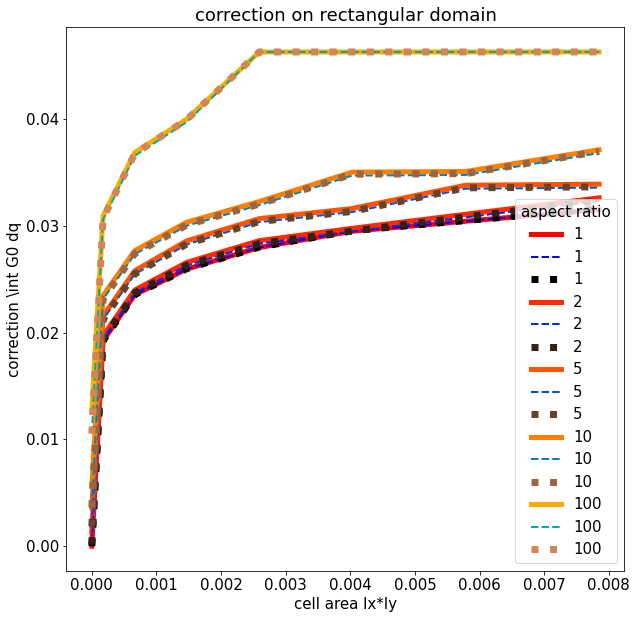

In [209]:
#plt.plot([l**2 for l in ls], ints)
#plt.plot([l**2 for l in ls], ints3)
cols1 = dict( [(ar, plt.cm.autumn(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols2 = dict( [(ar, plt.cm.winter(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols3 = dict( [(ar, plt.cm.copper(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
for ar in aspect_ratio[:-1]:
    lxs= [l*math.sqrt(ar) for l in ls]
    lys= [l/math.sqrt(ar) for l in ls]
    plt.plot([lx*ly for lx,ly in zip(lxs, lys)], ints_rect[ar], label=str(ar), linewidth=5, color=cols1[ar])
    plt.plot([lx*ly for lx,ly in zip(lxs, lys)], ints_rect_approx[ar], label=str(ar), linewidth=2, color=cols2[ar], linestyle='--')
    plt.plot([lx*ly for lx,ly in zip(lxs, lys)], [fct_for_rect(cutoff_length, lx, ly, c=c) for lx, ly in zip(lxs, lys)], label=str(ar), linewidth=7, color=cols3[ar], linestyle=':')
    #analytical answer: integrate arctan(sqrt(c) qx/(sqrt(a+cqy**2)))/(sqrt(a+cqy**2)

plt.legend(title="aspect ratio")
plt.title("correction on rectangular domain")
plt.xlabel("cell area lx*ly")
plt.ylabel("correction \int G0 dq")
#plt.savefig("rect_approx_c"+str(c)+"_a.png")